# Машинное обучение (ДВФУ)

## Домашнее задание 3 (10 баллов)

### Дедлайн: 27 марта, 23:59

Домашнее задание состоит из двух частей и бонусного задания. Каждая часть оценивается в 5 баллов, а все задания внутри одной части имеют одинаковый вес. За бонусное задание можно получить до трёх баллов, которые будут просуммированны с баллами за основное задание (то есть максимально за домашнее задание можно получить 13 баллов; баллы выше 10 так и пойдут в формулы оценок). 

### Про задание

1. Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`.

2. Гуглите как можно больше! Если у вас появляется какой-то вопрос про использование метода numpy, скорее всего, на него уже есть ответ в Google – главное, правильно задать вопрос! Использование поисковика резко поощряется. 

3. Плагиат не допускается (нельзя просто так списать у друга). **НО:** можно использовать **любую** информацию из открытых Интернет-источников с указанием ссылки на них. Правила оформления из ДЗ 1 сохраняются.

4. Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

---

## Часть 1: Линейная регрессия (5 баллов)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

В этой части мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

**Задание 0:** Зарегистрируйтесь на kaggle и скачайте файл с данными `diamonds.csv`. Создайте в папке, в которой находится эта тетрадка, папку `data` и переместите скачанный файл в неё. Если всё сделано правильно, то код ниже прочтёт и сохранит в переменную `data` датафрейм с данными.

In [54]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задание 1:** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [55]:
data.dropna()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задание 2:** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [56]:
data = data.drop("Unnamed: 0", axis = 1)

**Задание 3:** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [5]:
data.corr()
#больше всего коррелируют признаки carat, x, y, z(вес бриляьнта, его длина, ширина и глубина)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задание 4:** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [57]:
data = pd.get_dummies(data, columns=['cut'], drop_first=True)
data = pd.get_dummies(data, columns=['color'], drop_first=True)
data = pd.get_dummies(data, columns=['clarity'], drop_first=True)

**Задание 5:** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [59]:
#https://stackoverflow.com/questions/55373000/import-error-for-cannot-import-name-train-test-split-from-sklearn-preprocess
# https://pythobyte.com/split-data-training-and-testing-set-34994/
from sklearn.model_selection import train_test_split
y = data.price
x = data.drop('price', axis=1)
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,0.24,62.1,56.0,3.97,4.00,2.47,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
50052,0.58,60.0,57.0,5.44,5.42,3.26,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
41645,0.40,62.1,55.0,4.76,4.74,2.95,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
42377,0.43,60.8,57.0,4.92,4.89,2.98,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
17244,1.55,62.3,55.0,7.44,7.37,4.61,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,0.41,61.2,59.0,4.78,4.82,2.94,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12564,1.06,63.0,55.0,6.49,6.44,4.08,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
24786,1.51,60.8,60.0,7.42,7.38,4.50,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1332,0.71,58.9,61.0,5.80,5.90,3.44,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задание 6:** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [60]:
# https://youtu.be/PiDfEo7qpcw
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
features_train = x_train.iloc[:,[0, 1, 2, 3, 4, 5]]
features_test = x_test.iloc[:,[0, 1, 2, 3, 4, 5]]
x_train1 = ss.fit_transform(features_train)
x_test1 = ss.transform(features_test)
param = x_train.iloc[:,[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]
X_train = np.hstack([x_train1,param])
param1= x_test.iloc[:,[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]]
X_test = np.hstack([x_test1,param1])

array([[-1.17708677,  0.24854702, -0.65621302, ...,  0.        ,
         1.        ,  0.        ],
       [-0.46212432, -1.22141198, -0.20709927, ...,  0.        ,
         0.        ,  1.        ],
       [-0.84063385,  0.24854702, -1.10532676, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.49350827, -0.6614276 ,  1.14024197, ...,  1.        ,
         0.        ,  0.        ],
       [-0.18875632, -1.9913905 ,  1.58935572, ...,  0.        ,
         0.        ,  1.        ],
       [-0.84063385, -0.73142565, -0.65621302, ...,  0.        ,
         1.        ,  0.        ]])

**Задание 7:** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [95]:
#https://pythobyte.com/linear-regression-in-python-with-scikit-learn-bc1b4512/
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, regressor.predict(X_train))
mean_squared_error(y_test, regressor.predict(X_test))

1244765.4357158698

**Задание 8:** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [62]:
#https://pythobyte.com/linear-regression-in-python-with-scikit-learn-bc1b4512/
coeff_data = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_data
# carat и x, т.е. вес брильянта и его длина, по модулю существенно привышают остальные переменные

,Coefficient
carat,5338.615671
depth,-90.173817
table,-60.332280
x,-1100.418850
y,-6.458917
z,-34.258945
cut_Good,595.521080
cut_Ideal,846.196258
cut_Premium,777.769963
cut_Very Good,743.301360


**Задание 9:** Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [63]:
#https://pythobyte.com/lasso-regression-73016c58/
#from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10.0)
lasso=lasso_model.fit(X_train , y_train)
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=10.0)
ridge=ridge_model.fit(X_train , y_train)
coeff_data1 = pd.DataFrame(lasso.coef_, x.columns, columns=['Coefficient'])
coeff_data1

,Coefficient
carat,4756.602190
depth,-153.122715
table,-109.868576
x,-681.275333
y,-0.000000
z,-6.279439
cut_Good,-0.000000
cut_Ideal,163.904657
cut_Premium,76.636591
cut_Very Good,90.907316


In [64]:
coeff_data1 = pd.DataFrame(ridge.coef_, x.columns, columns=['Coefficient'])
coeff_data1
# при построении lasso регресии веса у коэффициентов уменьшились сильнее, чем при ridge в сравнении с изначальной регрессией. 
#  проблема сильной мультиколлинеарности есть, веса у некоторых коэф сильно уменьшились в сравнении с изначальной регрессией 

,Coefficient
carat,5286.285876
depth,-93.746314
table,-63.430106
x,-1062.006514
y,-5.916126
z,-33.689994
cut_Good,618.971148
cut_Ideal,873.580369
cut_Premium,801.950615
cut_Very Good,773.390190


**Задание 10:** Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

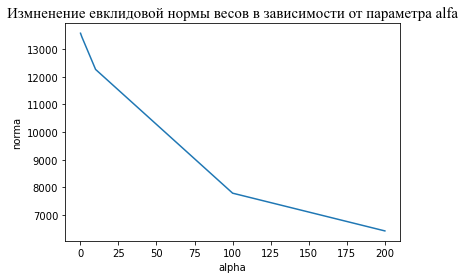

In [65]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
#1
ridge_model1 = Ridge(alpha = 0.1)
ridge1 = ridge_model1.fit(X_train , y_train)
C1 = np.linalg.norm(ridge1.coef_)
#2
ridge_model2 = Ridge(alpha = 1.0)
ridge2 = ridge_model2.fit(X_train , y_train)
C2 = np.linalg.norm(ridge2.coef_)
#3
ridge_model3 = Ridge(alpha = 10.0)
ridge3 = ridge_model3.fit(X_train , y_train)
C3 = np.linalg.norm(ridge3.coef_)
#4
ridge_model4 = Ridge(alpha = 100.0)
ridge4 = ridge_model4.fit(X_train , y_train)
C4 = np.linalg.norm(ridge4.coef_)
#5
ridge_model5 = Ridge(alpha = 200.0)
ridge5 =ridge_model5.fit(X_train , y_train)
C5 = np.linalg.norm(ridge5.coef_)

plt.title('Измненение евклидовой нормы весов в зависимости от параметра alfa', fontsize = 15, fontname='Times New Roman')
plt.xlabel('alpha', color='black')
plt.ylabel('norma',color='black')
plt.plot([0.1,1,10,100,200],[C1,C2,C3,C4,C5])
plt.show()


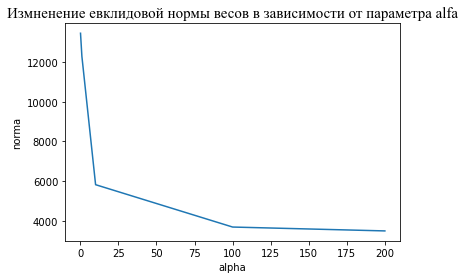

In [66]:
#1
lasso_model1 = Lasso(alpha = 0.1)
lasso1 = lasso_model1.fit(X_train, y_train)
C1 = np.linalg.norm(lasso1.coef_)
#2
lasso_model2 = Lasso(alpha = 1.0)
lasso2 = lasso_model2.fit(X_train, y_train)
C2 = np.linalg.norm(lasso2.coef_)
#3
lasso_model3 = Lasso(alpha = 10.0)
lasso3 = lasso_model3.fit(X_train, y_train)
C3 = np.linalg.norm(lasso3.coef_)
#4
lasso_model4 = Lasso(alpha = 100.0)
lasso4 = lasso_model4.fit(X_train, y_train)
C4 = np.linalg.norm(lasso4.coef_)
#5
lasso_model5 = Lasso(alpha = 200.0)
lasso5 =lasso_model5.fit(X_train, y_train)
C5 = np.linalg.norm(lasso5.coef_)
plt.title('Измненение евклидовой нормы весов в зависимости от параметра alfa', fontsize = 15, fontname='Times New Roman')
plt.xlabel('alpha', color = 'black')
plt.ylabel('norma', color = 'black')
plt.plot([0.1, 1, 10, 100, 200],[C1, C2, C3, C4, C5])
plt.show()
# Судя по графикам лассо регрессия агрессивнее ументшает веса, альфа быстрее стремится к нулю. 
#Поэтому Лассо используют для отббора признаков, также она зануляет большие коэф

**Задание 11:** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [94]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoCV
#https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.linear_model.lassocv
lasso = LassoCV(eps = 0.0001, n_alphas = 200, cv = 5)
lasso.fit(X_train,y_train)
matrix = pd.DataFrame({"MSE": lasso.mse_path_.mean(axis=1), "Alphas": lasso.alphas_})
matrix.sort_values(by = 'MSE')
# наилучшее значение 0.3868, при увеличении числа альфа оно остается такое же  

,MSE,alphas
198,1.294500e+06,0.386772
199,1.294505e+06,0.369279
197,1.294506e+06,0.405094
196,1.294526e+06,0.424284
195,1.294560e+06,0.444383
...,...,...
4,1.183221e+07,3068.689413
3,1.274565e+07,3214.055986
2,1.374769e+07,3366.308704
1,1.484691e+07,3525.773770


## Часть 2: Линейная классификация (5 баллов)

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

**Задание $12-\varepsilon$:** повторите шаги из задания 0 для новых данных `train.csv`.

In [46]:
train = pd.read_csv('data/train.csv')
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.

**Задание 12:** Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [47]:
y = train.price_range
y = np.where((y == 1), 0, y)
y = np.where((y == 2), 1, y)
y = np.where((y == 3), 1, y)
train = train.drop('price_range', axis=1)

**Задание 13:** Разделите выборку на обучающую и тестовую части, долю тестовой части укажите равной 0.3.

In [48]:
x = train
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки рекомендуется предварительно масштабировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

**Задание 14:** Отмасштабируйте признаки.

In [49]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**Задание 15:** Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним AUC ROC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?

Не забывайте, что метод `predict_proba` вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
clf = lr.fit(X_train, Y_train)
#https://medium.com/nuances-of-programming/%D0%BF%D0%BE%D1%88%D0%B0%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5-%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8-%D0%B2-python-a7c650ae77c2
y_pred = lr.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, Y_test)))


Accuracy of logistic regression classifier on test set: 0.99


In [50]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, clf.decision_function(X_test))
# высокая точность предсказания и прогноззные свойства, значения  AUC ROC и Accurac близки к 1, при пороге 0.5

0.9995333333333334

**Задание 16:** Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`. Что можно сказать о качестве классификации в целом? Какой порог классификации оптимален?

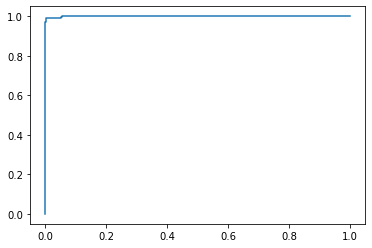

In [51]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, lr.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)

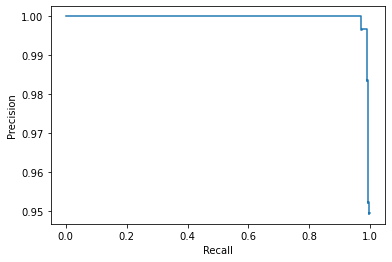

In [53]:
#https://runebook.dev/ru/docs/scikit_learn/auto_examples/miscellaneous/plot_display_object_visualization#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
prec, recall, _ = precision_recall_curve(Y_test, clf.decision_function(X_test),
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
# качество классификации в целом хорошее, ROC-кривая близка к 1